- Student 1 Name: SHASHWAT SINGH
- Student 2 Name: SAMEERAN BANERJEE

change the name of this notebook to  `name_1_name_2_notebook_??.ipynb` with *no spaces, no accents and no strange characters!* and where `??` stands for the number of the notebook you are working on.

# PPM Numerical Methods -- Numerical Methods for Physics

# Numerical methods: Root finding

# Root finding

## Bisection method

Use the bisection method to find the root of the function
    $$ f(x) = \frac{1}{2} - e^{-x}$$
think carefully how to estimate the error to end the calculation. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

0.6956956956956957 0.6956956956956957


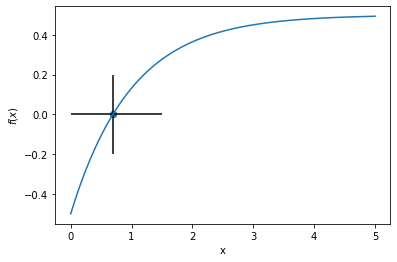

In [2]:
f = lambda x: (0.5 - np.exp(-x))

def bisec(a,b,y):   
    while y[a]*y[b]<0:
        b = b-1
    b = b+1
    while y[a]*y[b]<0:
        a = a+1
    return a,b

if __name__ == "__main__":
    x = np.linspace(0,5,1000, dtype=np.float64)
    y = f(x)
    a = 0
    b = -1
    a, b = bisec(a,b,y)
    print(x[a],x[b])
    plt.plot(x,y)
    plt.scatter((x[a],x[b]),(y[a],y[b]))
    plt.hlines(0,0,1.5)
    plt.vlines(np.log(2),-0.2,0.2)
    plt.xlabel("x")
    plt.ylabel("$f(x)$")
    plt.show()

## False-position method

Use the false position method to find the root of the function
    $$ f(x) = \frac{1}{2} - e^{-x}$$
and compare to the bisection method

In [3]:
f = lambda x: (0.5 - np.exp(-x))

def false_pos(a,b,y): 
    counter = 0 
    while y[a]*y[b]<0:
        xr1 = x[b] - (y[b]*(x[b]-x[a]))/(y[a]-y[b])
        b = b-1
        if counter > 1000:
            break
        counter += 1 
    b = b+1
    while y[a]*y[b]<0:
        xr2 = x[b] - (y[b]*(x[b]-x[a]))/(y[a]-y[b])   
        a = a+1
        if counter > 1000:
            break
        counter += 1 
    return xr1, xr2 

if __name__ == "__main__":
    x = np.linspace(0,5,1000, dtype=np.float64)
    y = f(x)
    a = 0
    b = -1
    xr1, xr2 = false_pos(a,b,y)
    print(xr1, xr2)

0.6974619338231848 0.6982410805842632


## The Newton-Raphson Method

Implement the Newton-Rapshon method to solve 
$$ f(x) = \frac{1}{2} - e^{-x}$$
and compare to the bisection and false position methods

- Try different starting guess values, e.g. -1, 1, 5 and 30
- Comment

In [4]:
f = lambda x: (0.5 - np.exp(-x))
f_dash = lambda x: np.exp(-x)

x = .1
e = .001
condition = 1

counter = 0 
while (condition):
    x_ = x - f(x)/f_dash(x)
    x = x_
    condition = (abs(f(x_) < e))
    if counter > 100:
        break
    counter += 1
print(x)

0.6931471805599453


## The Secant Method

Implement the Newton-Rapshon method to solve 
$$ f(x) = \frac{1}{2} - e^{-x}$$
and compare to the bisection and false position methods

- Try different starting guess values, e.g. -1, 1, 5 and 30
- Comment

In [5]:
f = lambda x: (0.5 - np.exp(-x))

def secant(x0,x1,e):
    x2 = x0 - (x1 - x0) * f(x0) / (f(x1) - f(x0)) 
    while abs(f(x2)) > e:
        x2 = x0 - (x1 - x0) * f(x0) / (f(x1) - f(x0)) 
        x0 = x1
        x1 = x2
    return x0, x1

if __name__ == "__main__":
    a = 0
    b = -1
    e = .0001
    x0, x1 = secant(a, b, e)
    print(x0, x1)

0.6881732387073796 0.6930399605396784


## The Modified Secant Method

Implement the modified secant method and compare it to the other methods.

In [6]:
f = lambda x: (0.5 - np.exp(-x))

def mod_secant(x0,x1,delta_x):
    x2 = x0 - delta_x * f(x0) / (f(x0 + delta_x) - f(x0))  
    while abs(f(x1)) > e:
        x1 = x0 - delta_x * f(x0) / (f(x0 + delta_x) - f(x0)) 
        x0 = x1
    return x0

if __name__ == "__main__":
    a = 0.
    b = -1.
    delta_x = .0001
    x0 = mod_secant(a, b, delta_x)
    print(x0)

0.6929959049344669
